# IMPORTS

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Etapa 4

Nesta secção será realizado arquiteturas de deep larning como DNN,CNN,RNN 

In [14]:
path1="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\X_train.csv"
path2="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\y_train.csv"
path3="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\X_val.csv"
path4="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\y_val.csv"
path5="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\X_test.csv"
path6="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\y_test.csv"

X_train=pd.read_csv(path1)
y_train=pd.read_csv(path2)
X_val=pd.read_csv(path3)
y_val=pd.read_csv(path4)
X_test=pd.read_csv(path5)
y_test=pd.read_csv(path6)




In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(neurons=1, optimizer='adam', layer_type='rectangular', dropout_rate=0.0, num_layers=2):
    model = Sequential()

    if layer_type == 'rectangular':
        for _ in range(num_layers):
            model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
            # Adicionar dropout se o dropout_rate for maior que 0
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))
    elif layer_type == 'conic':
        for _ in range(num_layers):
            model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))
            neurons=neurons //2

    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Criar o modelo KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=1)

# Definir os hiperparâmetros a serem testados
parameters = {
    'neurons': [128],
    'optimizer': ['adam'],
    'layer_type': ['conic'],
    'dropout_rate': [0.2],
    'num_layers': [2],  # Adicionado para escolher entre 2 ou 3 camadas
    'callbacks': [[EarlyStopping(monitor='val_loss', patience=3)]]
}

# Criar objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='r2', cv=5)

# Treinar o modelo usando a busca em grade
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_result.best_params_)

# Avaliar o modelo no conjunto de teste
test_score = grid_result.score(X_test, y_test)
print(f"Desempenho no Conjunto de Teste: {test_score:.4f}")



C:\Users\guilh\AppData\Local\Temp\ipykernel_14788\622824444.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
343/343 [==============================] - 17s 47ms/step - loss: 265.9817 - val_loss: 222.1019
Epoch 2/10
343/343 [==============================] - 7s 19ms/step - loss: 225.6729 - val_loss: 208.6018
Epoch 3/10
343/343 [==============================] - 7s 20ms/step - loss: 207.1147 - val_loss: 207.4782
Epoch 4/10
343/343 [==============================] - 7s 20ms/step - loss: 198.3475 - val_loss: 190.7627
Epoch 5/10
343/343 [==============================] - 7s 20ms/step - loss: 185.1460 - val_loss: 190.8344
Epoch 6/10
343/343 [==============================] - 7s 20ms/step - loss: 176.6147 - val_loss: 182.4403
Epoch 7/10
343/343 [==============================] - 7s 20ms/step - loss: 167.6194 - val_loss: 185.8850
Epoch 8/10
343/343 [==============================] - 7s 20ms/step - loss: 163.4320 - val_loss: 173.7362
Epoch 9/10
343/343 [==============================] - 7s 20ms/step - loss: 160.4116 - val_loss: 177.4085
Epoch 10/10
86/86 [==============================] - 0

### Convolutional Neural Network (CNN)

In [11]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Função para criar o modelo CNN
def create_cnn_model(kernel_size=3, filters=32, dense_units=128, dense_layers=2, dropout_rate=0.5, num_layers=3):
    model = Sequential()
    model.add(Conv1D(filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    filters=filters //2
    for _ in range(num_layers - 1):  # Adiciona camadas extras
        model.add(Conv1D(filters, kernel_size=kernel_size, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        filters=filters //2
    model.add(Flatten())

    for _ in range(dense_layers):  # Adiciona camadas densas
        model.add(Dense(dense_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])
    return model

# Crie um modelo KerasRegressor
model = KerasRegressor(build_fn=create_cnn_model, epochs=25, batch_size=32, verbose=1)

# Defina os hiperparâmetros a serem testados
parameters = {
    'kernel_size': [3],
    'filters': [32],
    'dense_units': [128],
    'dense_layers': [2],  # Adicionado para escolher entre 2 ou 3 camadas densas
    'dropout_rate': [0.2],
    'num_layers': [3],
    'callbacks': [[EarlyStopping(monitor='val_loss', patience=3)]]
}

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='r2', cv=3)

# Treine o modelo usando a busca em grade
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Exiba os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_result.best_params_)

# Avalie o modelo no conjunto de teste
test_score = grid_result.score(X_test, y_test)
print(f"Desempenho no Conjunto de Teste: {test_score:.4f}")


C:\Users\guilh\AppData\Local\Temp\ipykernel_14788\2109205748.py:29: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_cnn_model, epochs=25, batch_size=32, verbose=1)


Epoch 1/25
286/286 [==============================] - 64s 221ms/step - loss: 267.2299 - mean_squared_error: 267.2299 - val_loss: 245.2836 - val_mean_squared_error: 245.2836
Epoch 2/25
286/286 [==============================] - 52s 181ms/step - loss: 239.7460 - mean_squared_error: 239.7460 - val_loss: 230.9241 - val_mean_squared_error: 230.9241
Epoch 3/25
286/286 [==============================] - 53s 184ms/step - loss: 227.8339 - mean_squared_error: 227.8339 - val_loss: 231.5037 - val_mean_squared_error: 231.5037
Epoch 4/25
286/286 [==============================] - 54s 188ms/step - loss: 214.6625 - mean_squared_error: 214.6625 - val_loss: 207.2889 - val_mean_squared_error: 207.2889
Epoch 5/25
286/286 [==============================] - 53s 184ms/step - loss: 196.7818 - mean_squared_error: 196.7818 - val_loss: 205.0427 - val_mean_squared_error: 205.0427
Epoch 6/25
286/286 [==============================] - 52s 183ms/step - loss: 189.3016 - mean_squared_error: 189.3016 - val_loss: 194.22

LSTM

In [15]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def create_LSTMmodel(units=30, lr=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))
    return model

param_grid = {'units': [30],
              'callbacks': [[EarlyStopping(monitor='val_loss', patience=2)]]
              }

model = KerasRegressor(build_fn=create_LSTMmodel,epochs=10, batch_size=32, verbose=1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=None)
grid_search.fit(X_train, y_train,validation_data=(X_val, y_val))

# Print the best hyperparameters and the final scores on the validation and test sets
print("Best Hyperparameters:", grid_search.best_params_)
print("Final Model Scores (test set): ", grid_search.score(X_test, y_test))
     

C:\Users\guilh\AppData\Local\Temp\ipykernel_24704\2112898527.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_LSTMmodel,epochs=10, batch_size=32, verbose=1)


Epoch 1/10
343/343 [==============================] - 953s 3s/step - loss: 334.8571 - val_loss: 331.8148
Epoch 2/10
265/343 [======================>.......] - ETA: 3:25 - loss: 332.0549

KeyboardInterrupt: 

In [15]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# Build the LSTM model
#input_dim: size of the vocabulary (+1 for the padding token)
#output_dim: size of the embedding dimension
#input_length: length of the input sequences
def create_LSTMmodel(units=30, lr=0.001):

    model = Sequential()
    model.add(Bidirectional(LSTM(units=64,return_sequences=True),input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=64,return_sequences=True)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1,activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

parameters = {'units': [30]}

model = KerasRegressor(build_fn=create_LSTMmodel,epochs=25, batch_size=32, verbose=1)

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='r2', cv=3)

# Treine o modelo usando a busca em grade
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Exiba os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_result.best_params_)

# Avalie o modelo no conjunto de teste
test_score = grid_result.score(X_test, y_test)
print(f"Desempenho no Conjunto de Teste: {test_score:.4f}")

C:\Users\guilh\AppData\Local\Temp\ipykernel_14788\2239376068.py:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_LSTMmodel,epochs=25, batch_size=32, verbose=1)


Epoch 1/25
266/286 [==========================>...] - ETA: 38:13 - loss: 335.9113 - mean_squared_error: 335.9113

In [9]:
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

import tensorflow as tf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
     

def LSTM_create_and_fit_model(X_train,y_train, X_test, y_test, epochs=25, summary=True, fit=True):
  model = Sequential()
  model.add(LSTM(units=50, activation="relu", input_shape=(X_train.shape[1],1)))
  model.add(Dropout(0.2))
  model.add(Dense(1))

  model.compile(loss="mean_squared_error", optimizer="adam")
  callbacks = [EarlyStopping(monitor="val_loss", patience=3, verbose=1)]  
  if summary:
    model.summary()
  
  if fit:
    history = model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=20, 
                      validation_data=(X_test, y_test), callbacks=callbacks, shuffle=False)
  
  return model, history

In [10]:
model, history = LSTM_create_and_fit_model(X_train,y_train, X_test, y_test)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
 83/686 [==>...........................] - ETA: 27:42 - loss: nan

KeyboardInterrupt: 

In [16]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)[1]
print("Mean Squared Error on Test Set:", mse)

Epoch 1/10
368/497 [=====================>........] - ETA: 43s - loss: 465.4660 - mean_squared_error: 465.4660

### Dense Neural Network

In [11]:
print(X_train.shape)

(13906, 8774)


#### Modelo com 3 camadas

In [12]:
# Defina a arquitetura da DNN para regressão (poucas camadas)
model_few_layers = Sequential()
model_few_layers.add(Dense(128, activation='relu', input_shape=(8774,)))
model_few_layers.add(Dropout(0.5))
model_few_layers.add(Dense(64, activation='relu'))
model_few_layers.add(Dropout(0.5))
model_few_layers.add(Dense(1, activation='linear'))  # Camada de saída para regressão

# Compile o modelo
model_few_layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Imprimir informações do modelo
model_few_layers.summary()

# Treinar o modelo com poucas camadas
history_few_layers = model_few_layers.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1123200   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1131521 (4.32 MB)
Trainable params: 1131521 (4.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
435/435 [==============================] - 7s 12ms/step - loss: 481.1953 - mean_absolute_error: 14.4577 - val_loss: 416.5554 - val_mean_absolute_error: 12.7844
Epoch 2/10
435/435 [==============================] - 4s 10ms/step - loss: 421.6872 - mean_absolute_error: 13.3790 - val_loss: 385.6452 - val_mean_absolute_error: 12.1948
Epoch 3/10
435/435 [==============================] - 4s 10ms/step - loss: 404.4470 - mean_absolute_error: 13.0635 - val_loss: 395.5566 - val_mean_absolute_error: 12.3707
Epoch 4/10
435/435 [==============================] - 5s 11ms/step - loss: 385.8983 - mean_absolute_error: 12.7519 - val_loss: 371.6116 - val_mean_absolute_error: 12.0421
Epoch 5/10
435/435 [==============================] - 5s 11ms/step - loss: 385.8829 - mean_absolute_error: 12.7397 - val_loss: 386.1222 - val_mean_absolute_error: 12.3230
Epoch 6/10
435/435 [==============================] - 5s 10ms/step - loss: 367.3031 - mean_absolute_error: 12.4566 - val_loss: 360.5284 - val_mea

In [13]:
# Faça previsões usando o modelo DNN treinado
y_test_pred = model_few_layers.predict(X_test)

# Agora, y_test_pred contém as previsões para o conjunto de teste

# Avalie o desempenho do modelo, se necessário

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"Mean Absolute Error (Test): {mae_test:.2f}")

94/94 [==============================] - 0s 3ms/step
Mean Squared Error (Test): 298.01
Mean Absolute Error (Test): 11.44


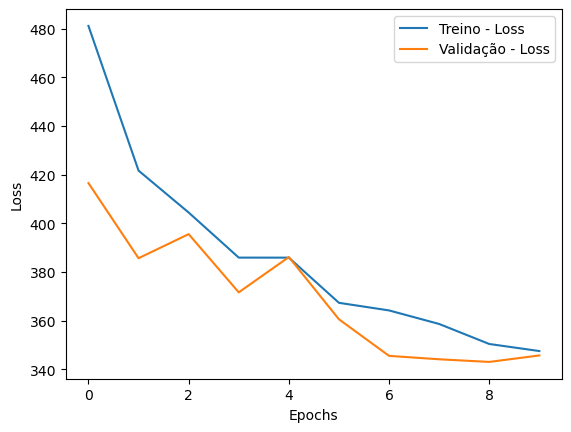

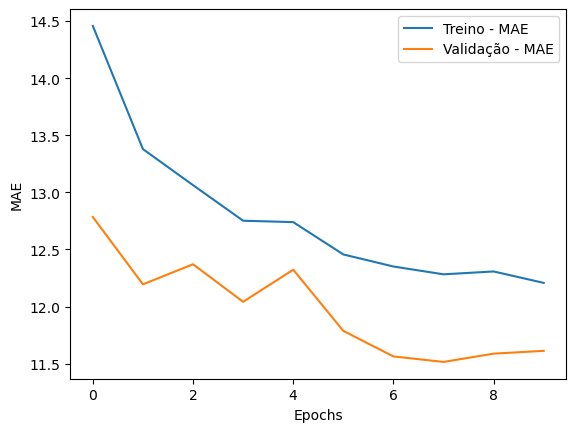

In [19]:
train_loss_few_layers = history_few_layers.history['loss']
val_loss_few_layers = history_few_layers.history['val_loss']
train_mae_few_layers = history_few_layers.history['mean_absolute_error']
val_mae_few_layers = history_few_layers.history['val_mean_absolute_error']

# Plotar as métricas de perda
plt.plot(train_loss_few_layers, label='Treino - Loss')
plt.plot(val_loss_few_layers, label='Validação - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar as métricas de MAE
plt.plot(train_mae_few_layers, label='Treino - MAE')
plt.plot(val_mae_few_layers, label='Validação - MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Um gráfico de loss decrescente é positivo, indicando que o modelo está a melhorar na minimização do erro durante o treino.

Um gráfico de MAE decrescente indica que o modelo está a melhorar ao longo do treino, representando a média das diferenças absolutas entre as previsões e os valores reais; quando o MAE na validação é consistentemente inferior ao treino, sugere uma boa capacidade de generalização para dados não vistos.

#### Modelo com 5 camadas (DNN)

In [15]:
# Defina a arquitetura da DNN para regressão (cinco camadas)
model_five_layers = Sequential()
model_five_layers.add(Dense(256, activation='relu', input_shape=(8774,)))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(128, activation='relu'))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(64, activation='relu'))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(32, activation='relu'))
model_five_layers.add(Dropout(0.5))
model_five_layers.add(Dense(1, activation='linear'))  # Camada de saída para regressão

# Compile o modelo
model_five_layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Imprimir informações do modelo
model_five_layers.summary()

# Treinar o modelo com cinco camadas
history_five_layers = model_five_layers.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2246400   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)               

In [16]:
y_test_pred = model_five_layers.predict(X_test)

# Agora, y_test_pred contém as previsões para o conjunto de teste

# Avalie o desempenho do modelo, se necessário
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"Mean Absolute Error (Test): {mae_test:.2f}")

94/94 [==============================] - 0s 4ms/step
Mean Squared Error (Test): 352.37
Mean Absolute Error (Test): 12.41


In [17]:
# Acessar as métricas de treinamento e validação do modelo com cinco camadas
train_loss_five_layers = history_five_layers.history['loss']
val_loss_five_layers = history_five_layers.history['val_loss']
train_mae_five_layers = history_five_layers.history['mean_absolute_error']
val_mae_five_layers = history_five_layers.history['val_mean_absolute_error']

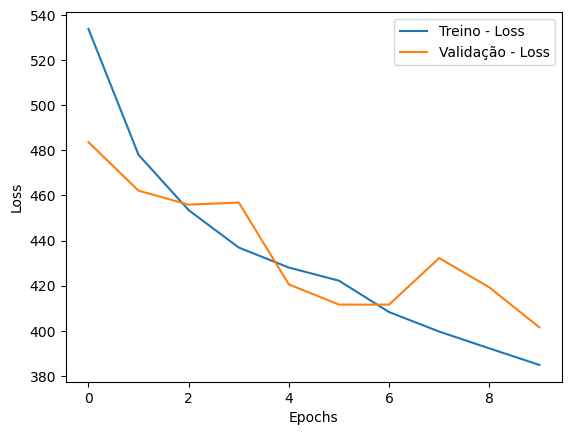

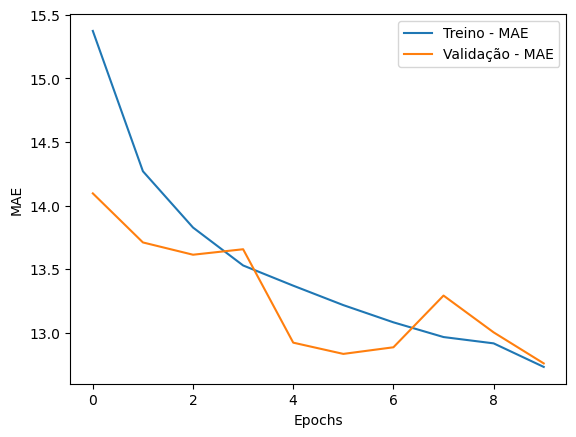

In [18]:
# Plotar as métricas de perda
plt.plot(train_loss_five_layers, label='Treino - Loss')
plt.plot(val_loss_five_layers, label='Validação - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar as métricas de MAE
plt.plot(train_mae_five_layers, label='Treino - MAE')
plt.plot(val_mae_five_layers, label='Validação - MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Aqui verificamos que curva de validação é geralmente descendente, mas apresenta picos ocasionais, pode ser um sinal de que o modelo está se ajustando bem à maioria dos padrões do conjunto de treino, mas encontra dificuldades em alguns casos específicos do conjunto de validação. Esses picos podem representar situações em que o modelo não está generalizando tão bem.

In [12]:
for x in range (2):
    print(x)

0
1


In [16]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Valores R² dos modelos
r2_values = [0.47, 0.43, 0.12, 0.33]

# Realizar ANOVA
f_statistic, p_value = f_oneway(*r2_values)

# Imprimir resultados da ANOVA
print(f'ANOVA - F Statistic: {f_statistic}, p-value: {p_value}')

# Realizar teste de Tukey
tukey_results = pairwise_tukeyhsd(r2_values)

# Imprimir resultados do teste de Tukey
print(tukey_results)


ModuleNotFoundError: No module named 'statsmodels'